In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [2]:
h = unp.uarray([920, 930, 938.3, 943.1], 0.1)  # mm
t = unp.uarray([391.62, 279.85, 188.29, 126.91], 0.01)  # s
N = np.array([10006, 10010, 10002, 10015])  # compte neutrons dans l'intervalle

Iinv = N/t  # comptage

894.9969967063323 894.99163360525 895.0023577813731 0.005363101082366484 0.005361075040809737


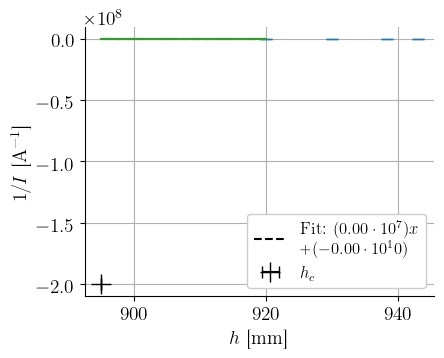

912.8895384089368 912.8848833842333 912.8941912345718 0.004655024703538402 0.00465282563504843


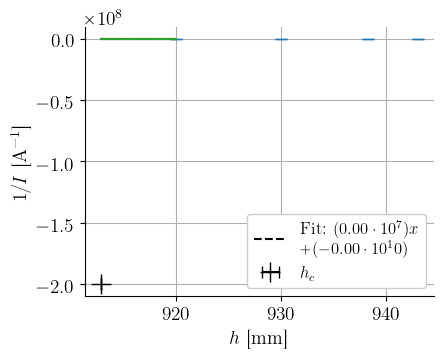

928.4148772703326 928.4108867112982 928.4188650334247 0.0039905590343778385 0.0039877630921409946


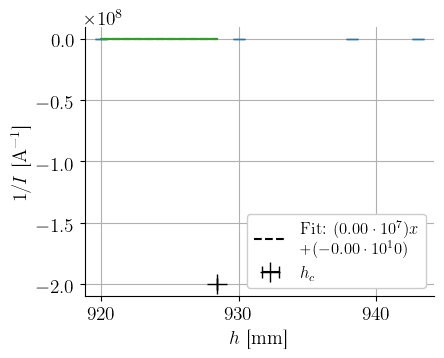

In [4]:
hc_est = np.zeros((len(h)-1, 3))
for i in range(len(h) - 1):  # basically pairwise
    coefs1 = np.polyfit(nom_vals(h[i:i+2]), nom_vals(Iinv[i:i+2]), 1)
    hc_avg = -coefs1[1]/coefs1[0]

    coefs2 = np.polyfit(nom_vals(h[i:i+2]), [Iinv[i].n + Iinv[i].s, Iinv[i+1].n - Iinv[i+1].s], 1)
    hc_low = -coefs2[1]/coefs2[0]

    coefs3 = np.polyfit(nom_vals(h[i:i+2]), [Iinv[i].n - Iinv[i].s, Iinv[i+1].n + Iinv[i+1].s], 1)
    hc_high = -coefs3[1]/coefs3[0]

    print(hc_avg, hc_low, hc_high, abs(hc_avg - hc_low), abs(hc_avg - hc_high))
    hc_est[i] = (hc_avg, hc_low, hc_high)

    # fuck it show it all
    plt.errorbar(nom_vals(h), nom_vals(Iinv), yerr=std_devs(Iinv), linestyle='none')

    x_avg = np.linspace(920, hc_avg)
    plt.plot(x_avg, np.poly1d(coefs1)(x_avg), '--', color='k', label=f"Fit: $({coefs1[0]*1e-7:.2f} \\cdot 10^7) x$\n$+ ({coefs1[1]*1e-10:.2f} \\cdot 10^{10})$")
    x_low = np.linspace(920, hc_low)
    plt.plot(x_low, np.poly1d(coefs2)(x_low))
    x_high = np.linspace(920, hc_high)
    plt.plot(x_high, np.poly1d(coefs3)(x_high))
    
    plt.errorbar([hc_avg], [-2e8], xerr=[[hc_avg-hc_low], [hc_high-hc_avg]], color='k', fmt='+', label='$h_c$')

    plt.xlabel(r'$h$ [mm]')
    plt.ylabel(r'$1/I$ [\si{\per\ampere}]')
    plt.legend()
    plt.grid()

    plt.savefig(f'../figures/h_I_pair{i+1}{i+2}.pdf')
    plt.show()

# trouvé: hc = 952.2
# aussi retrouvé nice

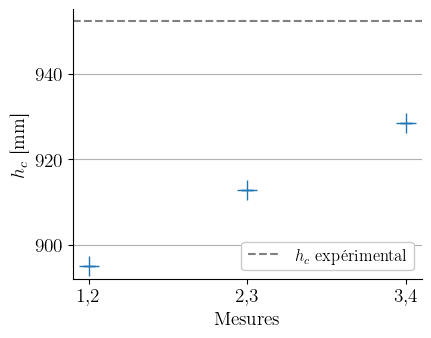

In [5]:
plt.errorbar(['1,2', '2,3', '3,4'], hc_est[:,0], yerr=np.abs(hc_est[:,1:].T - hc_est[:,0]), fmt='+')
plt.axhline(952.2, linestyle='--', label='$h_c$ expérimental')

plt.xlabel(r'Mesures')
plt.ylabel(r'$h_c$ [mm]')
plt.legend()
plt.grid(axis='y')
plt.savefig('../figures/hc_results_I.pdf')

In [6]:
', '.join(map(str, unp.uarray(hc_est[:,0], np.max(np.abs(hc_est[:,1:].T - hc_est[:,0]), axis=0))))

'894.997+/-0.005, 912.890+/-0.005, 928.415+/-0.004'